In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cpu')
input_size = 784 #pixel of 28by28
hidden_size = 100
num_classes = 10 #classes in the dataset 0-9
num_epochs = 2 #so that training doesnt take too long
batch_size = 100
learning_rate = 0.001

In [11]:
#load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./python_practice', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./python_practice', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
examples = next(iter(train_loader))
samples, labels = examples
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


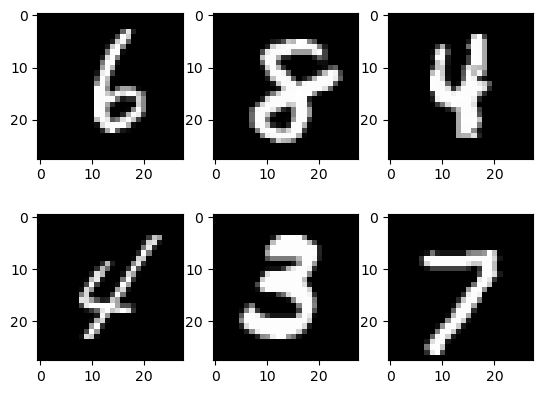

In [14]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [19]:
class NeuralNet(nn.Module):
    def __init__(self,  input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
model = NeuralNet(input_size, hidden_size, num_classes)
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #reshaping our image, its in 100,1,28,28 and we neeed it in 100,784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{n_total_steps}, loss={loss.item():.4f}')
#test and evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy: {acc}')


epoch: 1/2, step: 100/600, loss=0.4306
epoch: 1/2, step: 200/600, loss=0.2614
epoch: 1/2, step: 300/600, loss=0.2247
epoch: 1/2, step: 400/600, loss=0.1986
epoch: 1/2, step: 500/600, loss=0.2302
epoch: 1/2, step: 600/600, loss=0.2935
epoch: 2/2, step: 100/600, loss=0.1567
epoch: 2/2, step: 200/600, loss=0.1252
epoch: 2/2, step: 300/600, loss=0.2908
epoch: 2/2, step: 400/600, loss=0.1552
epoch: 2/2, step: 500/600, loss=0.2164
epoch: 2/2, step: 600/600, loss=0.1450
Accuracy: 95.5


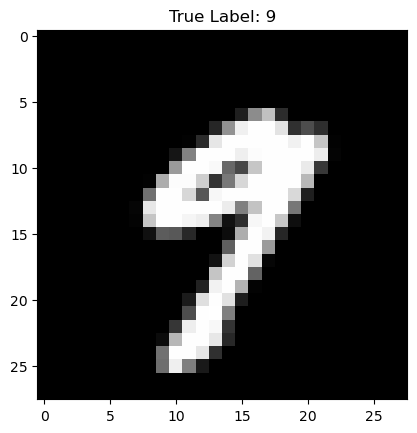

In [29]:
# testing
image, label = test_dataset[20]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f'True Label: {label}')
plt.show()

In [30]:
image = image.view(1, 28*28)
with torch.no_grad():
    output = model(image)
    predicted_label = torch.argmax(output, dim=1).item()
print(f'Predicted Label: {predicted_label}')


Predicted Label: 9
